# **Project: Credit Classification**

The primary goal of this project is to predict low credit score customers based on various features from a dataset of credit transactions. The project aims to develop a classification model capable of identifying customers with low credit scores.

This project is divided into three parts and constitutes the midcourse project for the Maven Analytics **Data Science in Python: Classification** course.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data

## Step 1: Data Prep & EDA

1. Import the data - perform any datatype conversion as necessary
2. Modify the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare your data for modelling. Create dummy variables, split your data into train and test, and scale your features if necessary.

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

credit_df = pd.read_csv("../Data/credit_train_clean.csv").drop(["Name", "SSN", "ID", "Customer_ID"], axis=1)

credit_df.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [139]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  float64
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              100000 non-null  object 
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

##### **Target Variable** - *predict low crdit score customers*

In [140]:
credit_df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [141]:
# combine good and standard 
cred_map = {
    'Standard': 'Good or Standard',
    'Poor': 'Poor',
    'Good': 'Good or Standard'
}

credit_df['Credit_Score'] = credit_df['Credit_Score'].map(cred_map)

In [142]:
credit_df['Credit_Score'].value_counts()

Credit_Score
Good or Standard    71002
Poor                28998
Name: count, dtype: int64

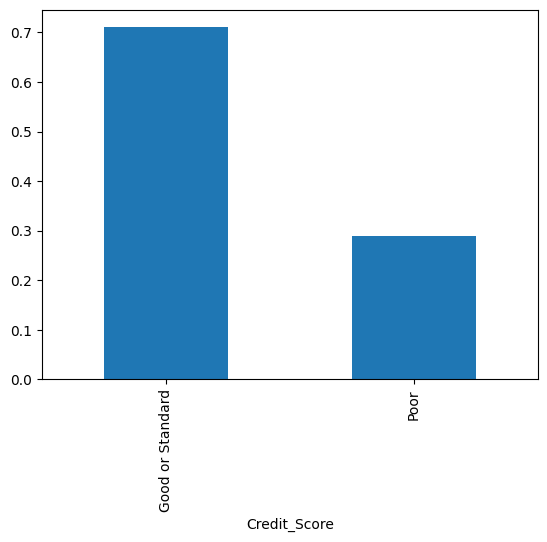

In [143]:
credit_df['Credit_Score'].value_counts(normalize = True).plot.bar();

In [144]:
# created target column

credit_df['Target'] = np.where(credit_df['Credit_Score'] == 'Poor', 1, 0)

In [145]:
credit_df.head(3)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Target
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good or Standard,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good or Standard,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good or Standard,0


##### **Exploring the Features**

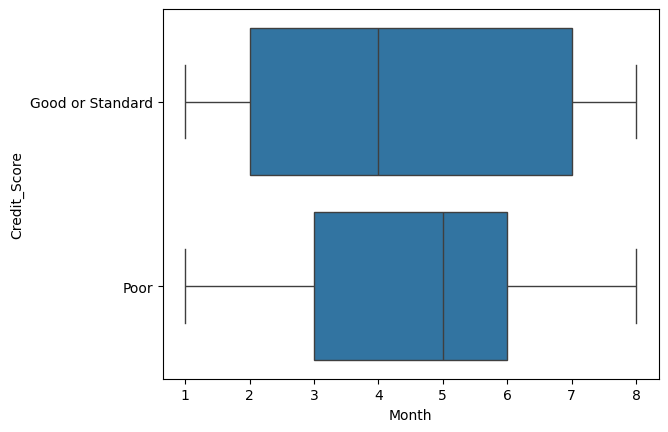

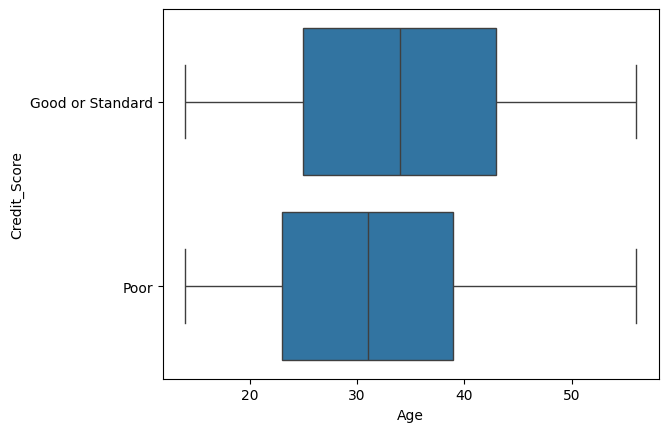

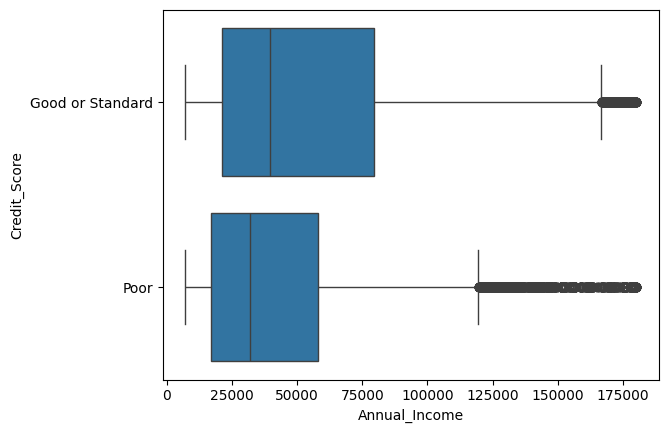

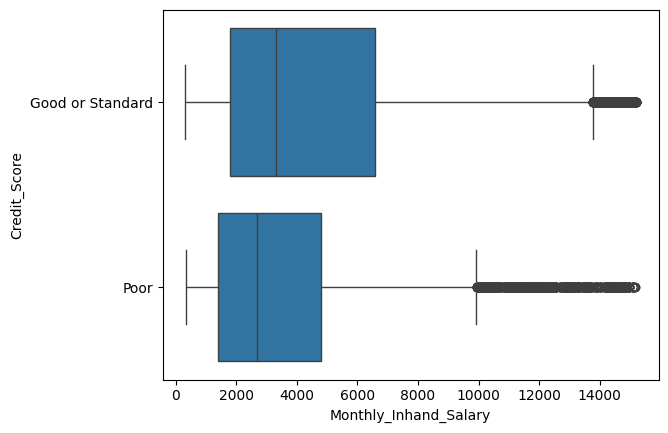

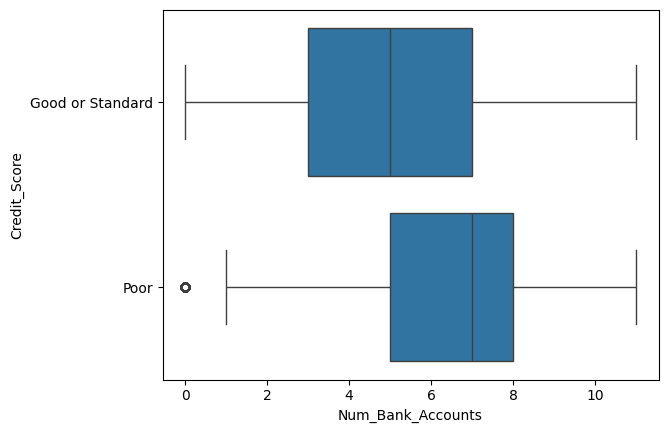

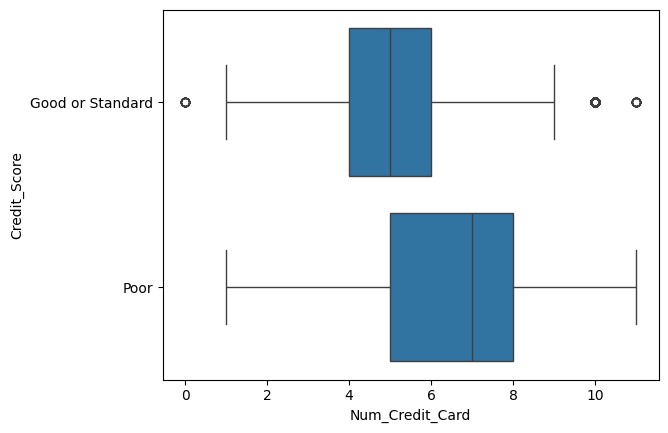

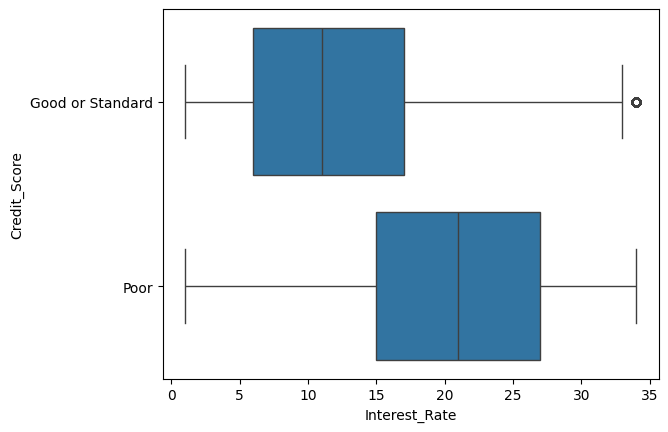

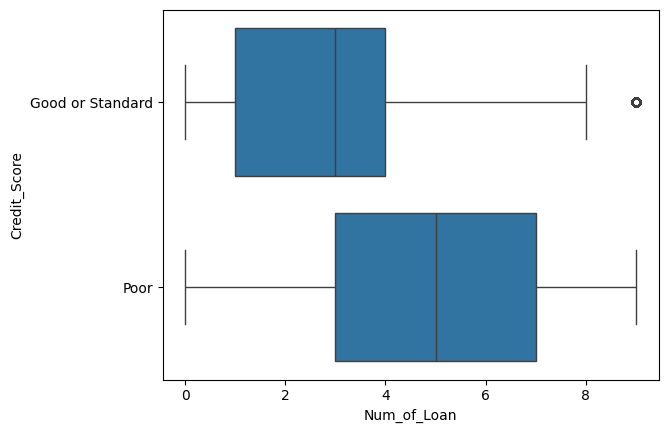

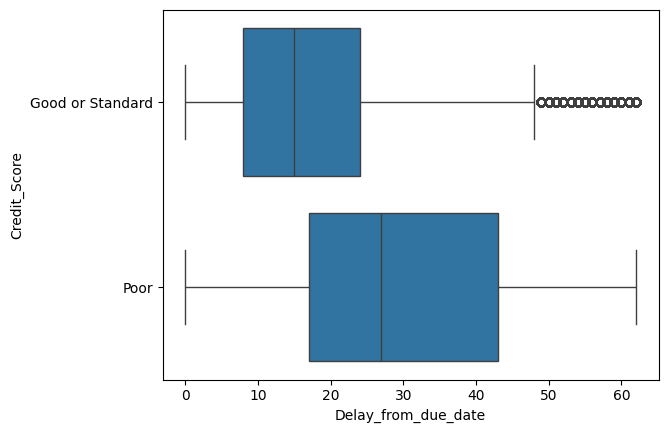

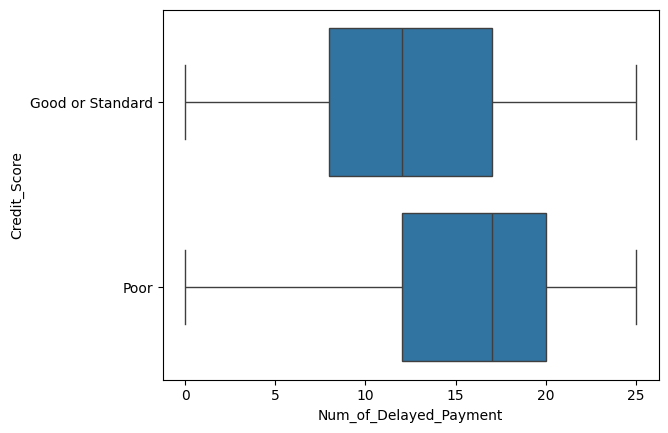

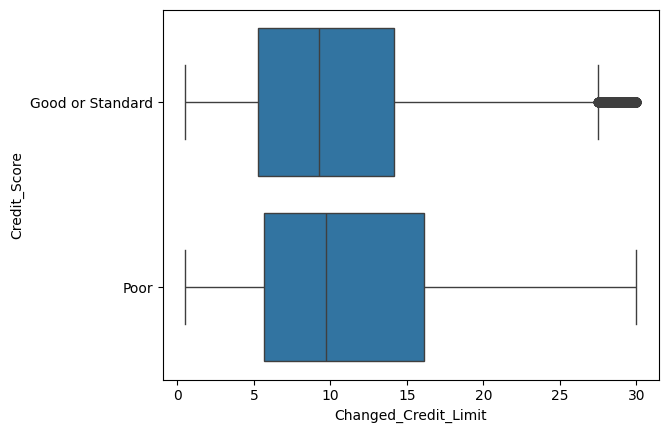

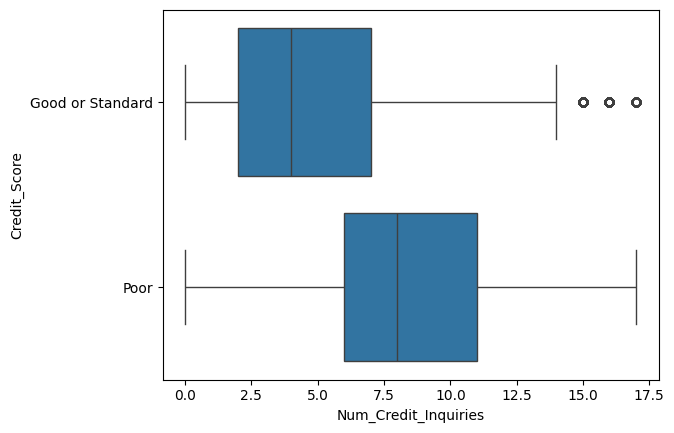

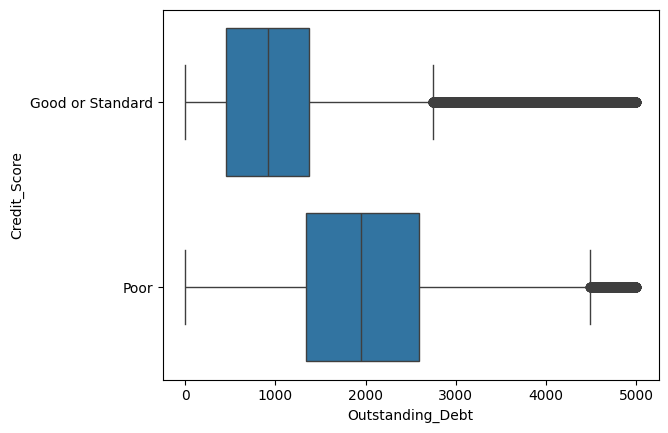

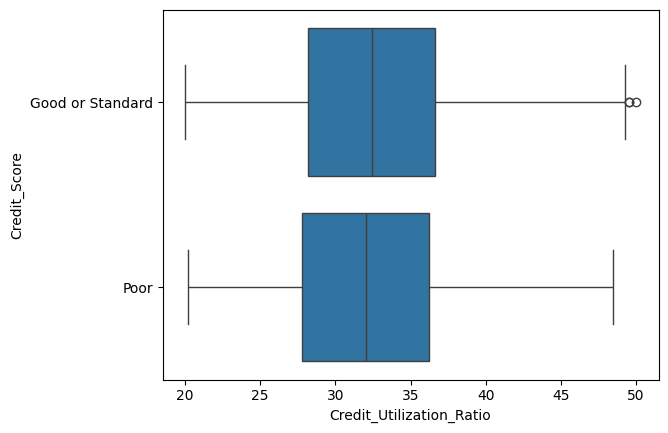

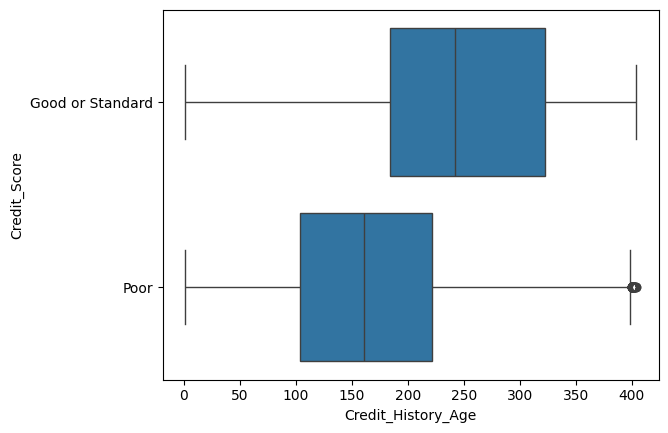

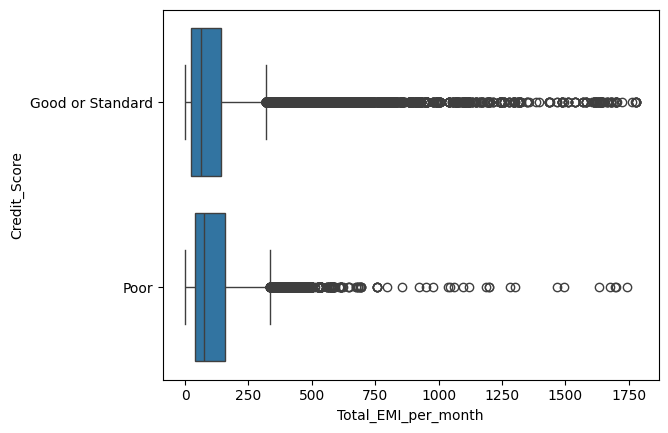

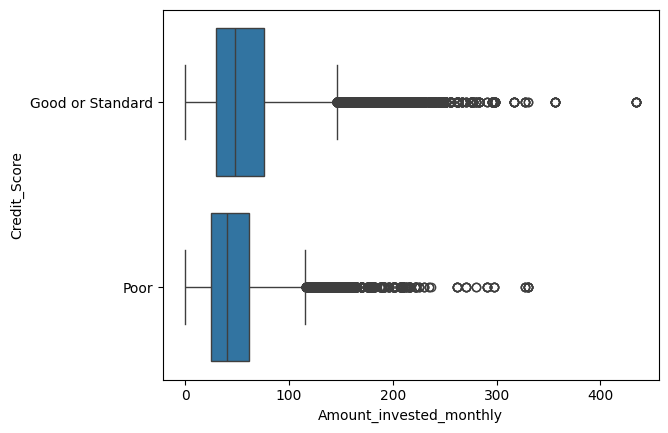

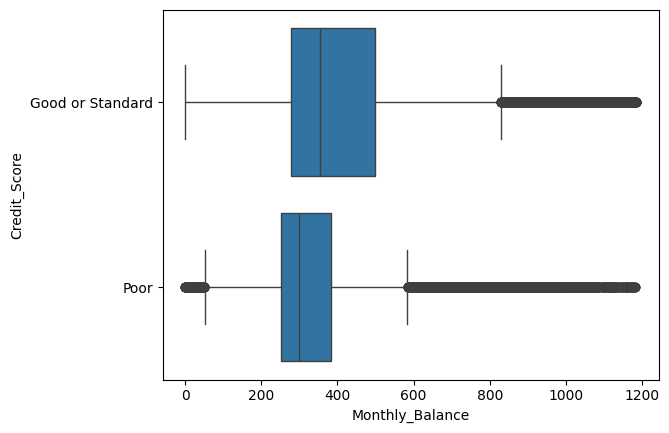

In [188]:
# explore all numeric data

# save all numeric columns into variable
numeric_columns = credit_df.drop('Target', axis = 1).select_dtypes('number').columns

for column in numeric_columns:
    sns.boxplot(x = credit_df[column], y = credit_df['Credit_Score'])
    plt.show()

##### **Numeric Columns Findings**

###### **SIGIFICANT**
Customers with a poor credit score tend to:
* have more bank accounts
* have more credit cards
* borrow at a higher interest rate
* have more loans
* delay payments after due date
* have more delayed payments
* inquire about credits more often
* have more outstanding debt
* have shorter credit history

###### **LESS SIGNIFICANT**
Customers with a poor credit score tend to:
* be younger
* have lower yearly salary
* have lower monthly inhand income (highly correlated with yearly salary)
* have lower monthly balance

###### **MAY BE NOT SIGNIFICANT**
* change credit limits
* total EMI per month
* amount invested monthly
* credit utilisation rate

In [147]:
credit_df['Type_of_Loan'].value_counts()

# drop this column from the model, too many categories, either no data or categories mixed with each other

Type_of_Loan
No Data                                                                                                                     11408
not specified                                                                                                                1408
credit-builder loan                                                                                                          1280
personal loan                                                                                                                1272
debt consolidation loan                                                                                                      1264
                                                                                                                            ...  
not specified,mortgage loan,auto loan,payday loan                                                                               8
payday loan,mortgage loan,debt consolidation loan,student loan               

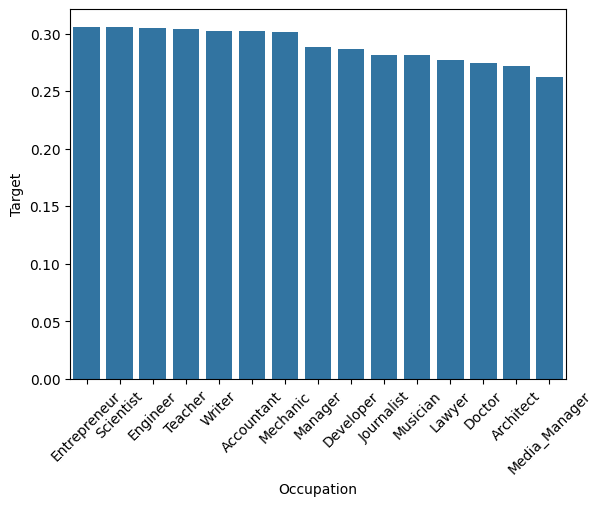

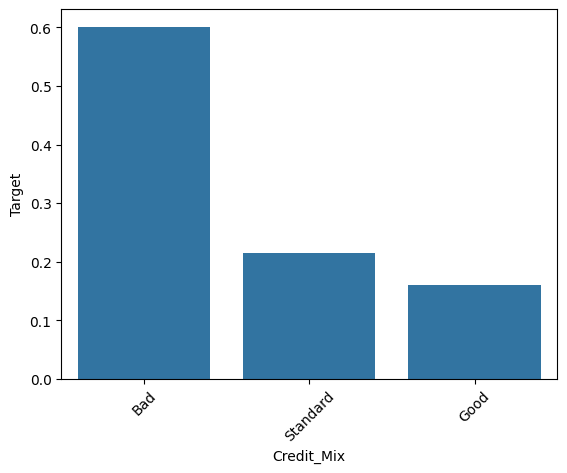

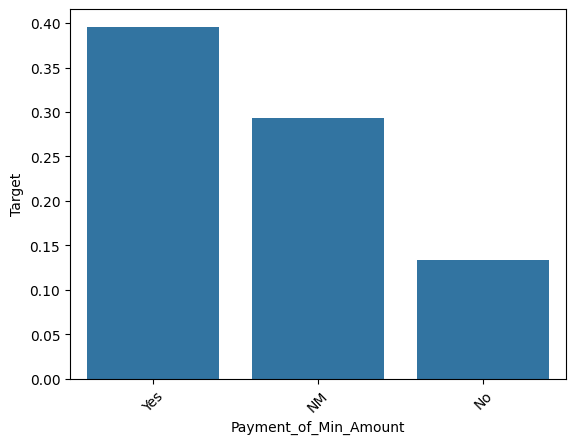

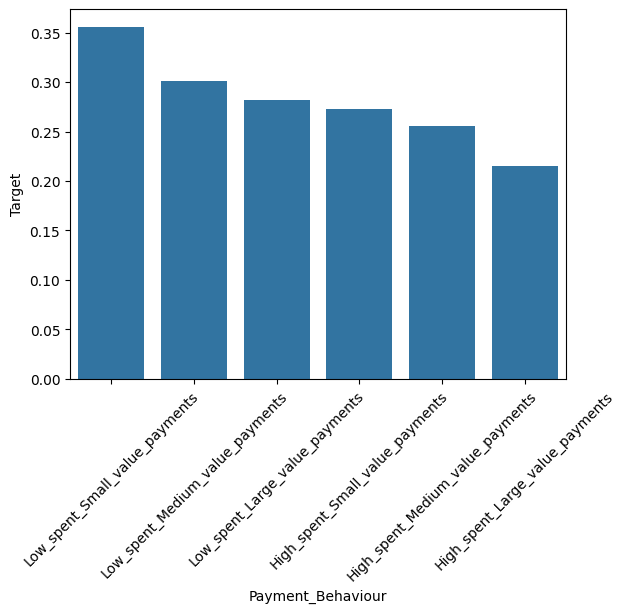

In [148]:
# explore all object data

# save all object columns into variable
columns_obj = credit_df.drop(['Type_of_Loan', 'Credit_Score'], axis = 1).select_dtypes('object').columns

for column in columns_obj:
    sns.barplot(
        data = (
            credit_df
            .groupby(column, as_index = True)
            .agg({'Target': 'mean'})
            .sort_values(by= 'Target', ascending = False)
        ),
        x = column,
        y = 'Target'
    )
    plt.xticks(rotation = 45)
    plt.show()

##### **Object Columns Findings**

###### **SIGIFICANT**
* payment of minimum amount
* payment behaviour
* credit mix

###### **NOT SIGNIFICANT**
* loan type
* occupation

##### **Correlation**

In [149]:
corr = credit_df.corr(numeric_only = True)

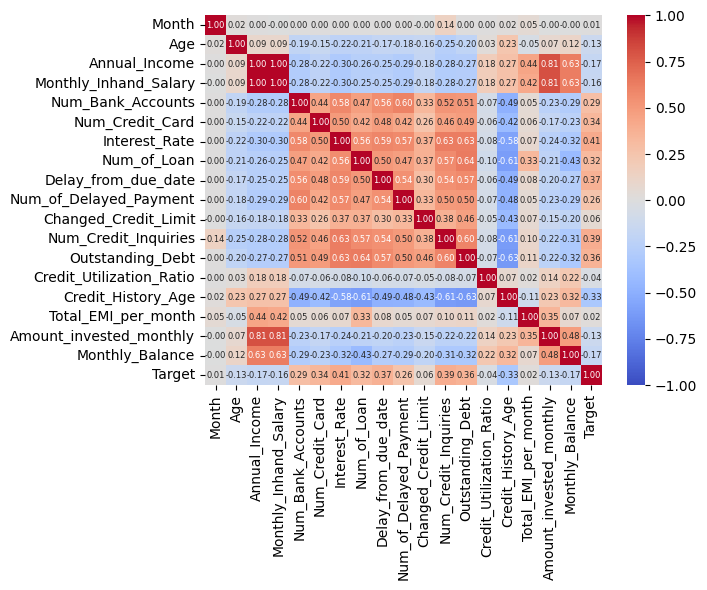

In [150]:
sns.heatmap(
    corr,
    annot = True,
    vmin = -1,
    vmax = 1,
    cmap = 'coolwarm',
    annot_kws={"fontsize": 6},
    fmt='.2f'
);

In [151]:
# as expected month, credit utilisation ratio, EMI per month, age, annual income, salary, amount invested are not highly correlated
# drop these columns, create age_annual income column and check correlation after

In [152]:
columns = credit_df.drop(
        [
            'Occupation',
            'Month',
            'Age', 
            'Annual_Income', 
            'Monthly_Inhand_Salary', 
            'Credit_Utilization_Ratio', 
            'Total_EMI_per_month', 
            'Amount_invested_monthly',
            'Monthly_Balance',
            'Changed_Credit_Limit',
            'Target',
            'Type_of_Loan'
        ],
        axis = 1
    )
columns.head()

,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,265.0,No,High_spent_Small_value_payments,Good or Standard
1,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Good,809.98,266.0,No,Low_spent_Large_value_payments,Good or Standard
2,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Good,809.98,267.0,No,Low_spent_Medium_value_payments,Good or Standard
3,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Good,809.98,268.0,No,Low_spent_Small_value_payments,Good or Standard
4,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Good,809.98,269.0,No,High_spent_Medium_value_payments,Good or Standard


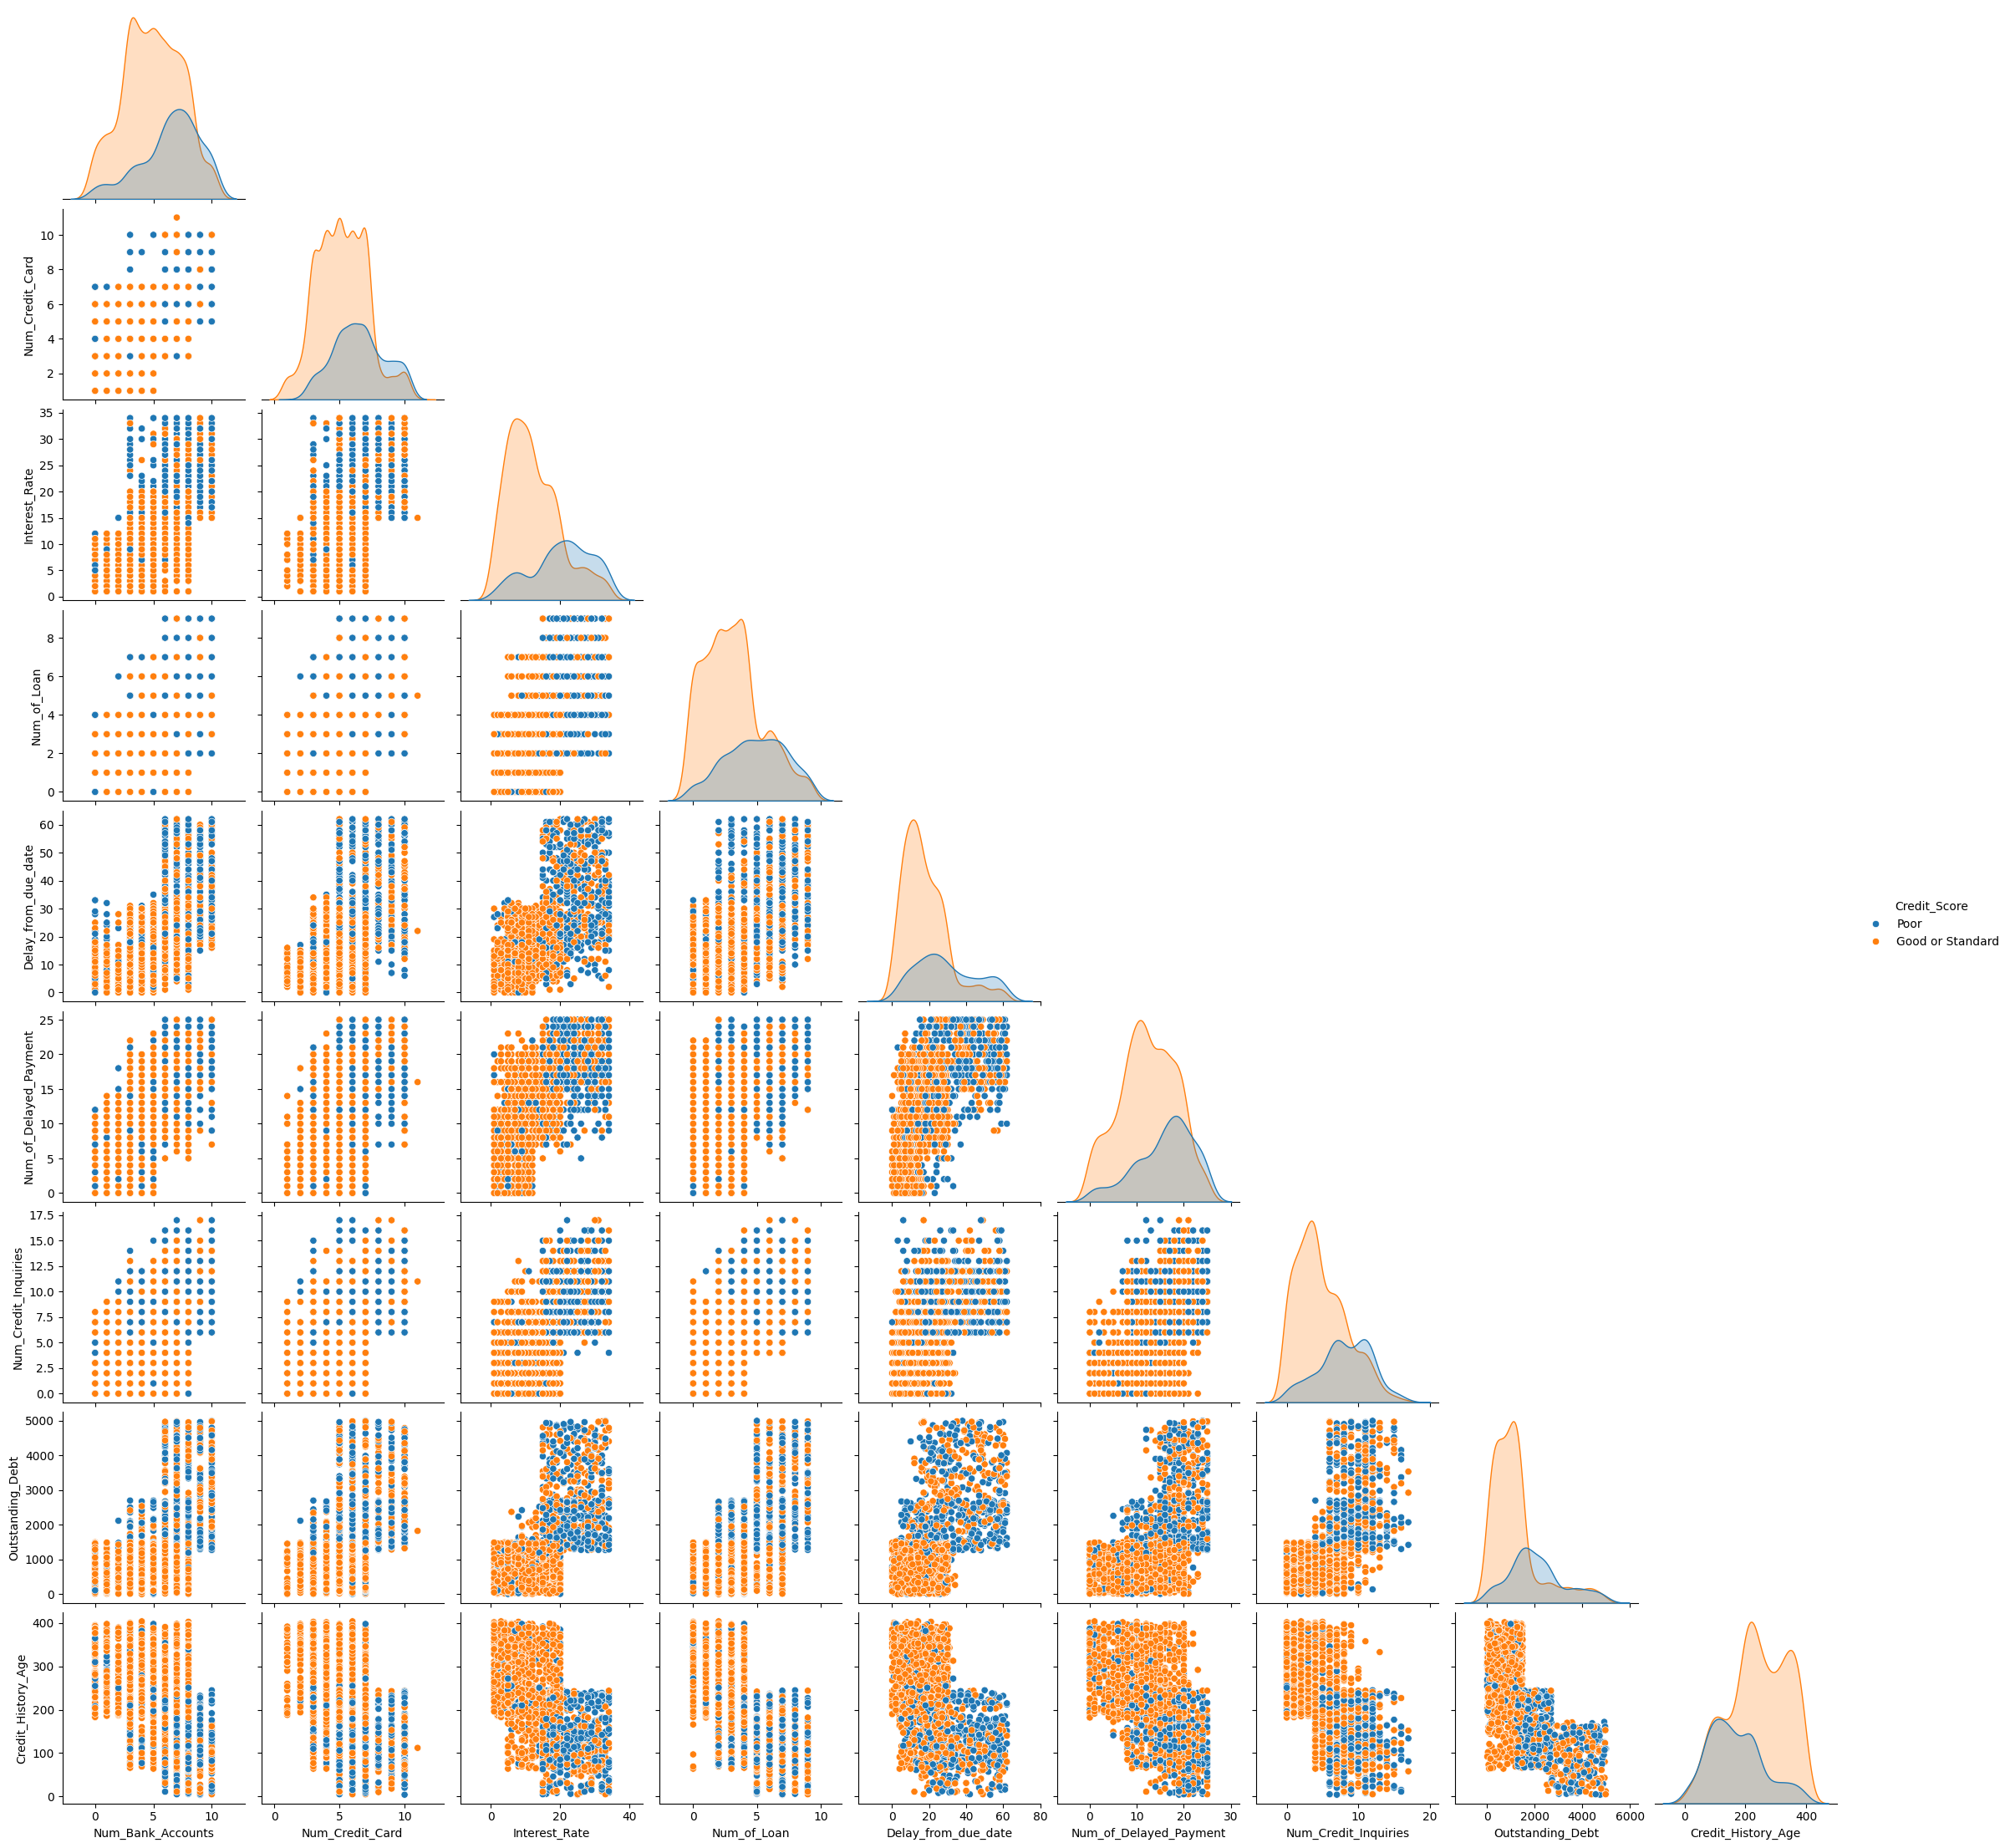

In [153]:
sns.pairplot(columns.sample(2000), hue = 'Credit_Score', corner = True);

# there seem to be a number of features highly correlated to each other

##### **Prepare and save final model dataset**

In [154]:
# save final model df to a new df for ease of use
model_df = credit_df.drop(
        [
            'Occupation',
            'Type_of_Loan'
        ],
        axis = 1
    )
model_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Target
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good or Standard,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good or Standard,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good or Standard,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good or Standard,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good or Standard,0


##### **Split and Standardise Data**

In [155]:
model_df.columns.to_list()

['Month',
 'Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score',
 'Target']

In [156]:
# create list of features
features = [
    "Age",
    "Month",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Credit_Utilization_Ratio",
    "Amount_invested_monthly",
    "Interest_Rate",
    "Num_Bank_Accounts",
    "Changed_Credit_Limit",
    "Num_Credit_Card",
    "Credit_History_Age", 
    "Payment_of_Min_Amount", 
    "Monthly_Balance", 
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Mix",
    "Total_EMI_per_month",
]

# assign features and target variables
X = pd.get_dummies(model_df[features], dtype = 'int', drop_first = True)
y = model_df['Target']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [157]:
print(f'Training Size: {X_train.shape[0]}, Test Size: {X_test.shape[0]}')

Training Size: 80000, Test Size: 20000


In [158]:
X_train.shape

(80000, 22)

In [159]:
# scale data
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Step 2: Logistic Regression

1. Fit a Logistic Regression Model that uses default hyperparameters.
2. Tune the hyperparameters of your logistic regression model
3. Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
4. Plot the ROC curve and report AUC for your tuned model

##### **Fit a Logistic Regression Model**

In [160]:
# fit logistic regression model
logreg = LogisticRegression(max_iter = 5000)
lr = logreg.fit(X_train, y_train)
lr

C:\Users\ewade\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [161]:
print(f'Train Score: {lr.score(X_train, y_train)}')

Train Score: 0.7864375


In [162]:
from sklearn.metrics import make_scorer, recall_score, f1_score

# Define range for hyperparameters based on initial results
parameters = {
    'C': np.linspace(0.1, 2.1, 21),  # Regression strength 
    'penalty': ['l1', 'l2']          # Regularization method
}

# Define scoring dictionary
scoring = {
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize GridSearchCV with LogisticRegression
gridsearch = GridSearchCV(
    LogisticRegression(solver='saga', max_iter=10000),
    parameters,
    cv=5,  # 5-fold cross-validation
    scoring=scoring,  # Specify recall and f1 as the scoring metrics
    refit='f1'  # Specify which metric to use for refitting
)

# Fit on X_train_std and y_train
gridsearch.fit(X_train_std, y_train)

# Output the best hyperparameters found by the grid search
print("Best hyperparameters found: ", gridsearch.best_params_)

# Output the best scores for each metric
print("Best recall score: ", gridsearch.cv_results_['mean_test_recall'][gridsearch.best_index_])
print("Best f1 score: ", gridsearch.cv_results_['mean_test_f1'][gridsearch.best_index_])

Best hyperparameters found:  {'C': 1.6, 'penalty': 'l1'}
Best recall score:  0.5194750909098014
Best f1 score:  0.5887447940068807


In [163]:
# fit model with scaled data
logreg = LogisticRegression(max_iter = 10000)
lr_std = logreg.fit(X_train_std, y_train)

In [164]:
print(f'Train Score: {lr_std.score(X_train_std, y_train)}')

Train Score: 0.7897375


In [165]:
# fit model with scaled data and tuned params
logregtun = LogisticRegression(**gridsearch.best_params_,solver='saga', max_iter=10000)
lr_tuned = logregtun.fit(X_train_std, y_train)

In [166]:
print(f'Train Score: {lr_tuned.score(X_train_std, y_train)}')

Train Score: 0.7897375


##### **Model Scoring**

In [167]:
print('Confusion Matrix before any threshold tuning')
print(f'{confusion_matrix(y_train, lr_std.predict(X_train_std))} Train CM')
print('-----')
print(f'{confusion_matrix(y_test, lr_std.predict(X_test_std))} Test CM')
print('-----')
print(f'{confusion_matrix(y_train, lr_tuned.predict(X_train_std))} HP Tuned Train')
print('-----')
print(f'{confusion_matrix(y_test, lr_tuned.predict(X_test_std))} HP Tuned Test')

Confusion Matrix before any threshold tuning
[[51140  5677]
 [11144 12039]] Train CM
-----
[[12779  1406]
 [ 2822  2993]] Test CM
-----
[[51141  5676]
 [11145 12038]] HP Tuned Train
-----
[[12778  1407]
 [ 2821  2994]] HP Tuned Test


In [168]:
print(f'Train Score: {lr_std.score(X_train_std, y_train)}')
print(f'Train Precision Score: {precision_score(y_train, lr_std.predict(X_train_std))}')
print(f'Train Recall Score: {recall_score(y_train, lr_std.predict(X_train_std))}')
print(f'Train F1 Score: {f1_score(y_train, lr_std.predict(X_train_std))}')
print('-----')
print(f'HP Tuned Train Score: {lr_tuned.score(X_train_std, y_train)}')
print(f'HP Tuned Train Precision Score: {precision_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'HP Tuned Train Recall Score: {recall_score(y_train, lr_tuned.predict(X_train_std))}')
print(f'HP Tuned Train F1 Score: {f1_score(y_train, lr_tuned.predict(X_train_std))}')

Train Score: 0.7897375
Train Precision Score: 0.6795552043350643
Train Recall Score: 0.519302937497304
Train F1 Score: 0.5887185505758087
-----
HP Tuned Train Score: 0.7897375
HP Tuned Train Precision Score: 0.6795754770238229
HP Tuned Train Recall Score: 0.5192598024414442
HP Tuned Train F1 Score: 0.5886984375382057


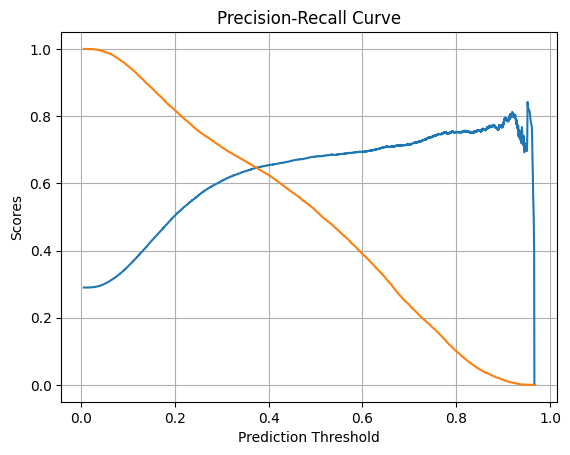

In [169]:
# plot the precision-recall curve

from sklearn.metrics import precision_recall_curve
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr_tuned.predict_proba(X_train_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

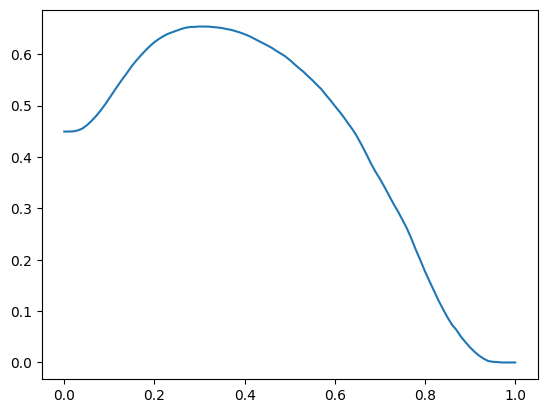

In [170]:
# tune f1

from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_tuned.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1);

In [171]:
# calculate the max f1 threshold

max_thresh = thresholds[f1.index(max(f1))]
max_thresh

0.3

In [172]:
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print(f'Train Accuracy Score: {accuracy_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Precision Score: {precision_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Recall Score: {recall_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train F1 Score: {f1_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print('-----')
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print(f'HP Train Accuracy Score: {accuracy_score(y_train, lr_tuned.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'HP Train Precision Score: {precision_score(y_train, lr_tuned.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'HP Train Recall Score: {recall_score(y_train, lr_tuned.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'HP Train F1 Score: {f1_score(y_train, lr_tuned.predict_proba(X_train_std)[:,1] > max_thresh)}')

Train Accuracy Score: 0.7827875
Train Precision Score: 0.6074468872603449
Train Recall Score: 0.7079325367726351
Train F1 Score: 0.6538515169020538
-----
HP Train Accuracy Score: 0.7827375
HP Train Precision Score: 0.6073490230905861
HP Train Recall Score: 0.707975671828495
HP Train F1 Score: 0.6538132132969506


In [173]:
print('Confusion Matrix after threshold tuning')
print(f'{confusion_matrix(y_train, lr_tuned.predict_proba(X_train_std)[:,1]> max_thresh)} Train CM')

Confusion Matrix after threshold tuning
[[46206 10611]
 [ 6770 16413]] Train CM


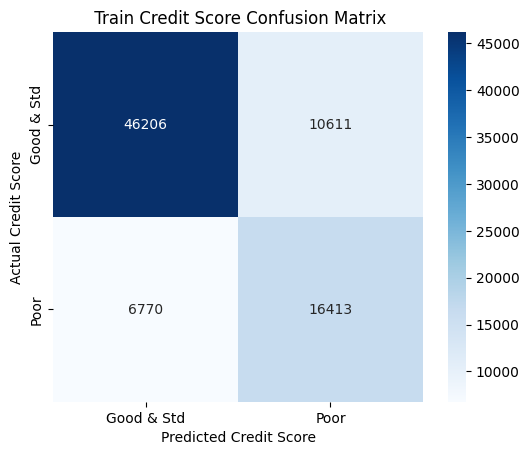

In [174]:
y_pred = lr_tuned.predict_proba(X_train_std)[:,1]> max_thresh

lr_confusion = confusion_matrix(y_train, y_pred)

sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good & Std", "Poor"],        
    yticklabels=["Good & Std", "Poor"]
).set(
    xlabel='Predicted Credit Score',
    ylabel='Actual Credit Score',
    title=' Train Credit Score Confusion Matrix'
);

In [175]:
print('Confusion Matrix after threshold tuning')
print(f'{confusion_matrix(y_test, lr_tuned.predict_proba(X_test_std)[:,1]> max_thresh)} Test CM')

Confusion Matrix after threshold tuning
[[11572  2613]
 [ 1689  4126]] Test CM


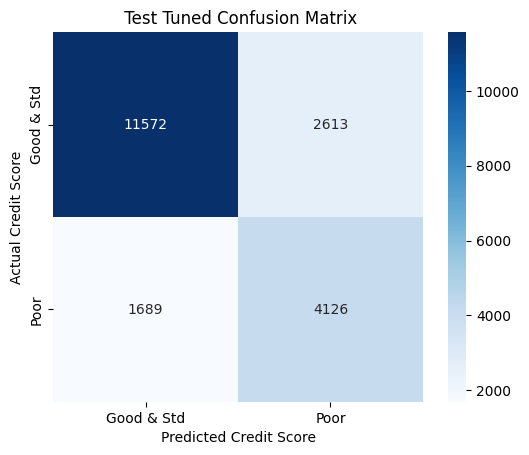

In [176]:
y_pred = lr_tuned.predict_proba(X_test_std)[:,1]> max_thresh

lr_confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good & Std", "Poor"],        
    yticklabels=["Good & Std", "Poor"]
).set(
    xlabel='Predicted Credit Score',
    ylabel='Actual Credit Score',
    title=' Test Tuned Confusion Matrix'
);

##### **ROC curve and AUC score**

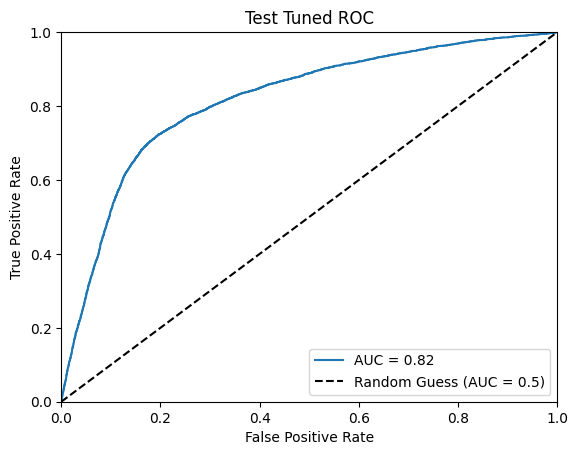

In [177]:
from sklearn.metrics import roc_curve, auc

# Generate ROC AUC for tuned model
y_probs = lr_tuned.predict_proba(X_test_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# build plot

plt.title('Test Tuned ROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)
plt.plot([0, 1],[0, 1], 'k--', label = 'Random Guess (AUC = 0.5)')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Step 3. Imbalanced Data Techniques

1. Try using SMOTE, by resampling up to an equal number of 0s and 1s, then tune your model threshold. 
2. Did this improve your model performance in terms of accuracy, F1, and AUC?

In [178]:
import imblearn.over_sampling as OS  # Import the imbalanced-learn library for oversampling

# Initialize the SMOTE with the defined sampling strategy and a random state for reproducibility
smt = OS.SMOTE(
    sampling_strategy= 'auto',
    random_state=2023
)

# Apply the SMOTE to the training data
# X_train_rs and y_train_rs will be the resampled feature set and target set respectively
X_train_smt, y_train_smt = smt.fit_resample(X_train_std, y_train)

# Print the count of positive samples before and after oversampling for verification
print(f'Original Positive Class Count: {np.sum(y_train == 1)}')
print(f'Oversample Positive Class Count: {np.sum(y_train_smt == 1)}')

Original Positive Class Count: 23183
Oversample Positive Class Count: 56817


In [179]:
# fit model with resampled scaled data 
logreg = LogisticRegression(**gridsearch.best_params_,
                            solver='saga', 
                            max_iter=10000, 
                            # class_weight='balanced'
                           )
lr_smt = logreg.fit(X_train_smt, y_train_smt)

print(f"Train Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")
print(f"Test Accuracy: {lr_smt.score(X_test_std, y_test)}")

Train Accuracy: 0.7617966453702237
Test Accuracy: 0.7834


In [180]:
print(f'Train Accuracy Score Std: {accuracy_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Score SMOTE: {lr_smt.score(X_train_smt, y_train_smt)}')
print('-----')
print(f'Train Precision Score Std: {precision_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Precision Score SMOTE: {precision_score(y_train_smt, lr_smt.predict(X_train_smt))}')
print('-----')
print(f'Train Recall Score Std: {recall_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train Recall Score SMOTE: {recall_score(y_train_smt, lr_smt.predict(X_train_smt))}')
print('-----')
print(f'Train F1 Score Std: {f1_score(y_train, lr_std.predict_proba(X_train_std)[:,1] > max_thresh)}')
print(f'Train F1 Score SMOTE: {f1_score(y_train_smt, lr_smt.predict(X_train_smt))}')

Train Accuracy Score Std: 0.7827875
Train Score SMOTE: 0.7617966453702237
-----
Train Precision Score Std: 0.6074468872603449
Train Precision Score SMOTE: 0.7872467798312187
-----
Train Recall Score Std: 0.7079325367726351
Train Recall Score SMOTE: 0.7174965239276977
-----
Train F1 Score Std: 0.6538515169020538
Train F1 Score SMOTE: 0.7507550644567219


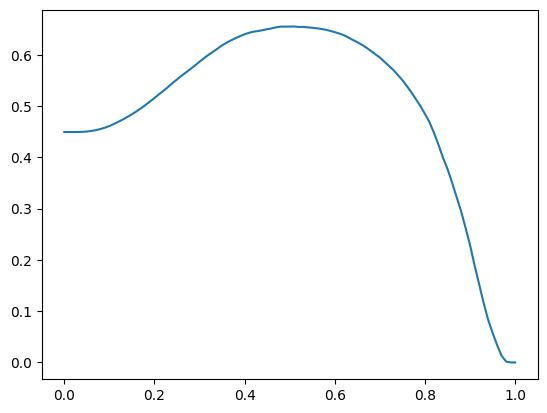

In [181]:
# tune f1

from sklearn.metrics import f1_score

f1 = []

smt_thresholds = np.linspace(0, 1, 101)

for thresh in smt_thresholds:
    y_pred =(lr_smt.predict_proba(X_train_std)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=smt_thresholds, y=f1);

In [182]:
# calculate the max f1 threshold

max_thresh_smt = smt_thresholds[f1.index(max(f1))]
max_thresh_smt

0.51

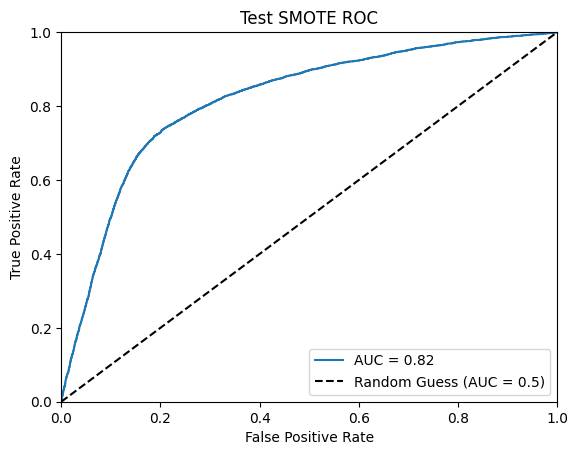

In [183]:
from sklearn.metrics import roc_curve, auc

# Generate ROC AUC for tuned model
y_probs = lr_smt.predict_proba(X_test_std)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

# build plot

plt.title('Test SMOTE ROC')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % auc_score)
plt.plot([0, 1],[0, 1], 'k--', label = 'Random Guess (AUC = 0.5)')
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [184]:
print('Test Dataset Confusion Matrix after standarisation and SMOTE')
print(f'{confusion_matrix(y_test, lr_smt.predict_proba(X_test_std)[:,1]> max_thresh_smt)}')

Test Dataset Confusion Matrix after standarisation and SMOTE
[[11564  2621]
 [ 1672  4143]]


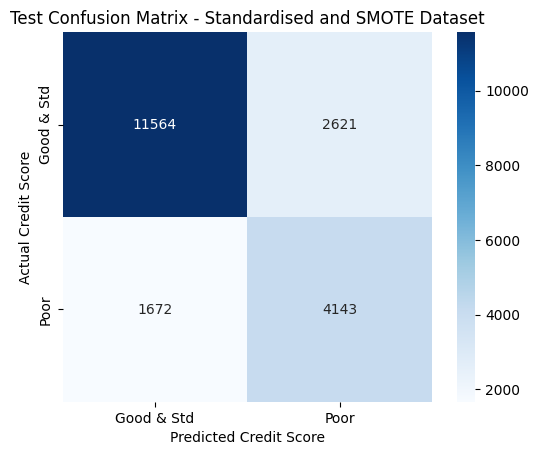

In [185]:
y_pred = lr_smt.predict_proba(X_test_std)[:,1]> max_thresh_smt

lr_confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Good & Std", "Poor"],        
    yticklabels=["Good & Std", "Poor"]
).set(
    xlabel='Predicted Credit Score',
    ylabel='Actual Credit Score',
    title='Test Confusion Matrix - Standardised and SMOTE Dataset'
);

#### **All models perfromance metrics on Test Dataset**

In [186]:
# Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
print("\033[1m\033[4mAccuracy Scores\033[0m")
print(f'Std Test: {accuracy_score(y_test, lr_std.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'HP Tuned Test: {accuracy_score(y_test, lr_tuned.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'SMOTE Test: {accuracy_score(y_test, lr_smt.predict_proba(X_test_std)[:,1] > max_thresh_smt)}')
print('-----')
print("\033[1m\033[4mPrecision Scores\033[0m")
print(f'Std Test: {precision_score(y_test, lr_std.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'HP Tuned Test: {precision_score(y_test, lr_tuned.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'SMOTE Test: {precision_score(y_test, lr_smt.predict_proba(X_test_std)[:,1] > max_thresh_smt)}')
print('-----')
print("\033[1m\033[4mRecall Scores\033[0m")
print(f'Std Test: {recall_score(y_test, lr_std.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'HP Tuned Test: {recall_score(y_test, lr_tuned.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'SMOTE Test: {recall_score(y_test, lr_smt.predict_proba(X_test_std)[:,1] > max_thresh_smt)}')
print('-----')
print("\033[1m\033[4mF1 Scores\033[0m")
print(f'Std Test: {f1_score(y_test, lr_std.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'HP Tuned Test: {f1_score(y_test, lr_tuned.predict_proba(X_test_std)[:,1] > max_thresh)}')
print(f'SMOTE Test: {f1_score(y_test, lr_smt.predict_proba(X_test_std)[:,1] > max_thresh_smt)}')

Accuracy Scores
Std Test: 0.78485
HP Tuned Test: 0.7849
SMOTE Test: 0.78535
-----
Precision Scores
Std Test: 0.6122327790973872
HP Tuned Test: 0.6122570114260276
SMOTE Test: 0.6125073920756948
-----
Recall Scores
Std Test: 0.7092003439380912
HP Tuned Test: 0.7095442820292347
SMOTE Test: 0.7124677558039553
-----
F1 Scores
Std Test: 0.6571587921281172
HP Tuned Test: 0.6573203759757846
SMOTE Test: 0.6587169091342714


#### **Summary**
**Marginal Gains:**
* The improvements in the metrics with SMOTE are very small. While there is a positive impact, it's not substantial.

**Model Complexity and Computation:**
* Applying SMOTE increases the complexity and computational requirements of your model.
* Given the minor improvements, we need to weigh if this added complexity is justified.

**Business Context:**
* In some applications, even a small increase in recall (which translates to identifying more bad credit customers) might be critical. 

#### **Recommendation**

Given the minor differences in performance metrics, I think we should be using the hyperparameter-tuned logistic regression model without SMOTE (lr_tuned). This model offers nearly the same performance with potentially less complexity and computational cost. To further improve our model's performance, we can explore other machine learning algorithms.